In [1]:
# TensorFlow et tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Téléchargement du dataset MNIST
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Prétraitement des données
train_images = train_images / 255.0
test_images = test_images / 255.0

# Construction du modèle
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entraînement du modèle
model.fit(train_images, train_labels, epochs=10)

# Évaluation du modèle
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nPrécision sur le jeu de test: {test_acc}')

C:\Users\ll\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9277 - loss: 0.2568
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9661 - loss: 0.1134
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9768 - loss: 0.0775
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9823 - loss: 0.0574
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9866 - loss: 0.0443
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9888 - loss: 0.0366
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9914 - loss: 0.0286
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9928 - loss: 0.0232
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9947 - loss: 0.0180
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9950 - loss: 0.0157
313/313 - 2s - 5ms/step - accuracy: 0.9785 - loss: 0.0808

Précision sur le jeu de test: 0.9785000085830688


In [2]:
# Classification de texte avec des critiques de films
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Chargement du dataset IMDb
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Préparation des données
word_index = imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

# Vectorisation des données
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

# Construction du modèle
vocab_size = 10000
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(train_data,
                    train_labels,
                    epochs=40,
                    batch_size=512,
                    validation_split=0.2,
                    verbose=1)

# Évaluation du modèle
results = model.evaluate(test_data, test_labels, verbose=2)
print(f'Précision: {results[1]}')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 48s 3us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 4s 3us/step
Epoch 1/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.6127 - loss: 0.6880 - val_accuracy: 0.7324 - val_loss: 0.6782
Epoch 2/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7334 - loss: 0.6646 - val_accuracy: 0.7662 - val_loss: 0.6432
Epoch 3/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7704 - loss: 0.6183 - val_accuracy: 0.7704 - val_loss: 0.5870
Epoch 4/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8024 - loss: 0.5536 - val_accuracy: 0.8112 - val_loss: 0.5201
Epoch 5/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8299 - loss: 0.4847 - val_accuracy: 0.8268 - val_loss: 0.4615
Epoch 6/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8493 - loss: 0.4252 - val_accuracy: 0.8478 - val_loss: 0.4136
Epoch 7/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8627 - loss: 0.3793 - val_accuracy: 0.8372 - val_loss: 0.3896
Epoch 8/40

In [4]:
import torch
import numpy as np

# Création de tensors
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

# Création à partir de numpy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

# Opérations sur les tensors
x = torch.ones(2, 2)
y = torch.rand(2, 2)
z = x + y
z = torch.add(x, y)

# Indexing et slicing
tensor = torch.ones(4, 4)
tensor[:,1] = 0

# Conversion vers numpy
t = torch.ones(5)
n = t.numpy()

# Déplacement sur GPU
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

100.0%
100.0%
100.0%
100.0%


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


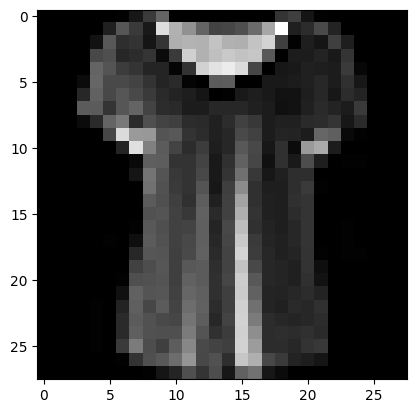

Label: 0


In [5]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# Chargement du dataset FashionMNIST
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# Création des DataLoaders
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Affichage d'échantillons
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [6]:
import torch
from torch import nn

# Définition du modèle
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# Instanciation du modèle
model = NeuralNetwork()
print(model)

# Test du modèle
X = torch.rand(1, 28, 28)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
Predicted class: tensor([7])


In [7]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Hyperparamètres
learning_rate = 1e-3
batch_size = 64
epochs = 5

# Chargement des données
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# Définition du modèle
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

# Définition de la loss function et de l'optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Boucle d'entraînement
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Calcul des prédictions et de la loss
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

# Entraînement du modèle
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.303633  [    0/60000]
loss: 2.286511  [ 6400/60000]
loss: 2.275481  [12800/60000]
loss: 2.273243  [19200/60000]
loss: 2.260459  [25600/60000]
loss: 2.223832  [32000/60000]
loss: 2.235119  [38400/60000]
loss: 2.197005  [44800/60000]
loss: 2.195743  [51200/60000]
loss: 2.170484  [57600/60000]
Test Error: 
 Accuracy: 41.5%, Avg loss: 2.164775 

Epoch 2
-------------------------------
loss: 2.173412  [    0/60000]
loss: 2.162867  [ 6400/60000]
loss: 2.114901  [12800/60000]
loss: 2.134674  [19200/60000]
loss: 2.095867  [25600/60000]
loss: 2.023427  [32000/60000]
loss: 2.060966  [38400/60000]
loss: 1.979399  [44800/60000]
loss: 1.979185  [51200/60000]
loss: 1.919121  [57600/60000]
Test Error: 
 Accuracy: 60.6%, Avg loss: 1.915151 

Epoch 3
-------------------------------
loss: 1.945351  [    0/60000]
loss: 1.914565  [ 6400/60000]
loss: 1.809794  [12800/60000]
loss: 1.850881  [19200/60000]
loss: 1.744500  [25600/60000]
loss: 1.685743  [32000/600